In [1]:
# IMPORT REQUIRED LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

SEED = 9

In [2]:
# IMPORT PROCESSED DATA

abs_df = pd.read_csv("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Data\\AvgAbs.csv", index_col=0)

wavelengths = abs_df.iloc[:, :-1].columns

abs_df.head()

,410 nm,435 nm,460 nm,485 nm,510 nm,535 nm,560 nm,585 nm,610 nm,645 nm,680 nm,705 nm,730 nm,760 nm,810 nm,860 nm,900 nm,940 nm,Brix Values
42,1.160208,1.433482,1.102001,1.427669,1.091721,0.849255,0.957169,0.822053,0.674458,0.493407,0.475213,0.253846,0.275406,0.354932,0.481001,0.497283,0.350676,0.440172,7.200000
69,1.115100,1.292357,1.090623,1.131447,0.747845,0.427201,0.228494,0.194339,0.211481,0.295132,0.251923,0.104439,0.110744,0.141743,0.235702,0.249634,0.309466,0.407492,7.550000
73,1.282566,1.350010,0.980134,1.100872,0.661333,0.366210,0.323086,0.251444,0.366739,0.339596,0.450456,0.198145,0.219877,0.277715,0.390678,0.469410,0.318111,0.399615,7.766667
71,1.208027,1.333837,1.104201,1.157112,0.738939,0.395012,0.315633,0.263137,0.159227,0.333943,0.204052,0.159479,0.074780,0.111455,0.207624,0.239128,0.322009,0.424862,8.366667
74,1.273745,1.351996,0.975557,1.121409,0.675378,0.350359,0.324610,0.265009,0.385801,0.364600,0.468189,0.198405,0.199085,0.270528,0.404852,0.475141,0.324526,0.404669,8.875000


### Absorbance Spectra Plot

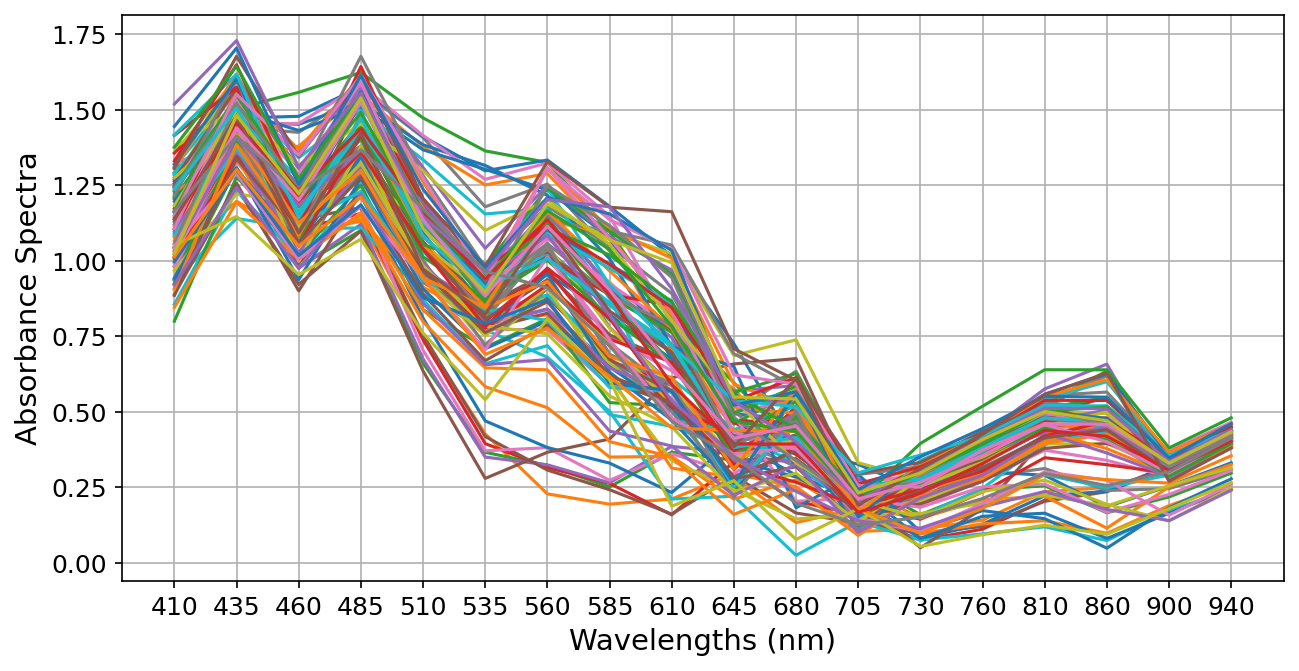

In [3]:
plt.figure(figsize=(10, 5), dpi=150)

for i in range(abs_df.shape[0]):
    plt.plot(wavelengths, abs_df.iloc[i, :-1])

plt.xticks(ticks=list(range(18)), 
            labels=["410", "435", "460", "485", "510", "535", "560", "585", "610", "645", "680", "705", "730", "760",
                    "810", "860", "900", "940"],
            fontsize=12)

plt.yticks(fontsize=12)

plt.xlabel('Wavelengths (nm)', fontsize=14)
plt.ylabel('Absorbance Spectra', fontsize=14)
plt.grid(visible=True)
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\vis_nirs_apple.png")
plt.show()

### Correlation Matrix

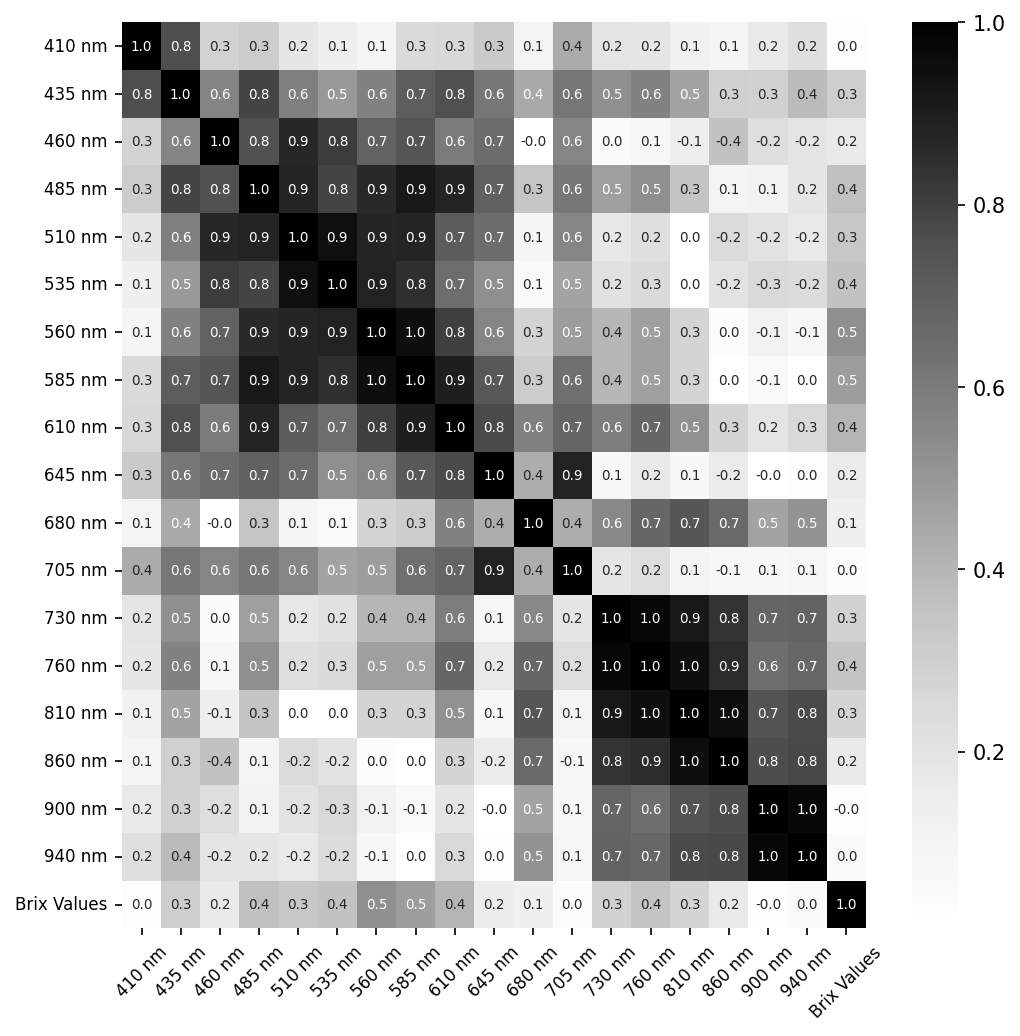

In [4]:
plt.figure(figsize=(8, 8), dpi=150)

sns.heatmap(abs_df.corr().abs(), annot=abs_df.corr().round(decimals=1), fmt=".1f", cmap="Greys", annot_kws={"size":6.5})

plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\apple_corr.png")
plt.show()


### BRIX Values Distribution

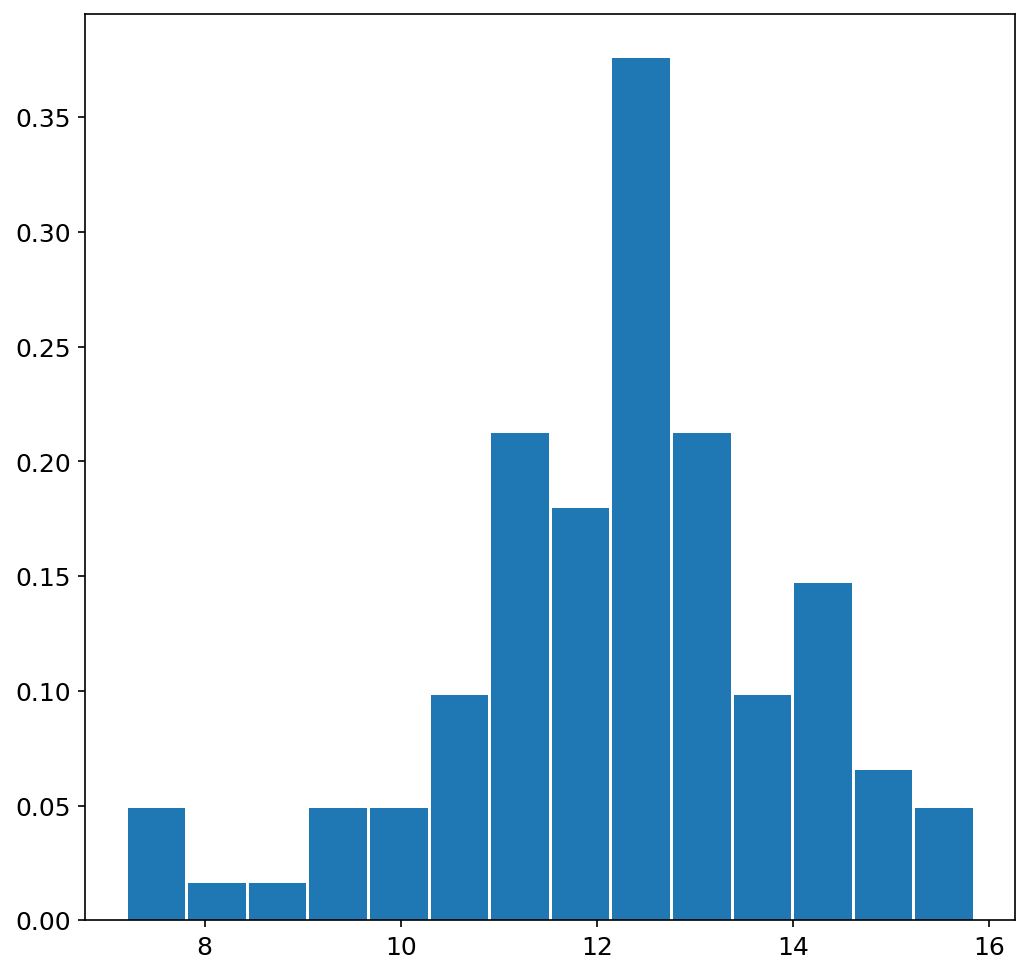

In [6]:
plt.figure(figsize=(8, 8), dpi=150)

plt.hist(abs_df.iloc[:, -1], bins=14, density=True, rwidth=0.95)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\brix_distribution.png")
plt.show()

### Absorbance Value Distributions

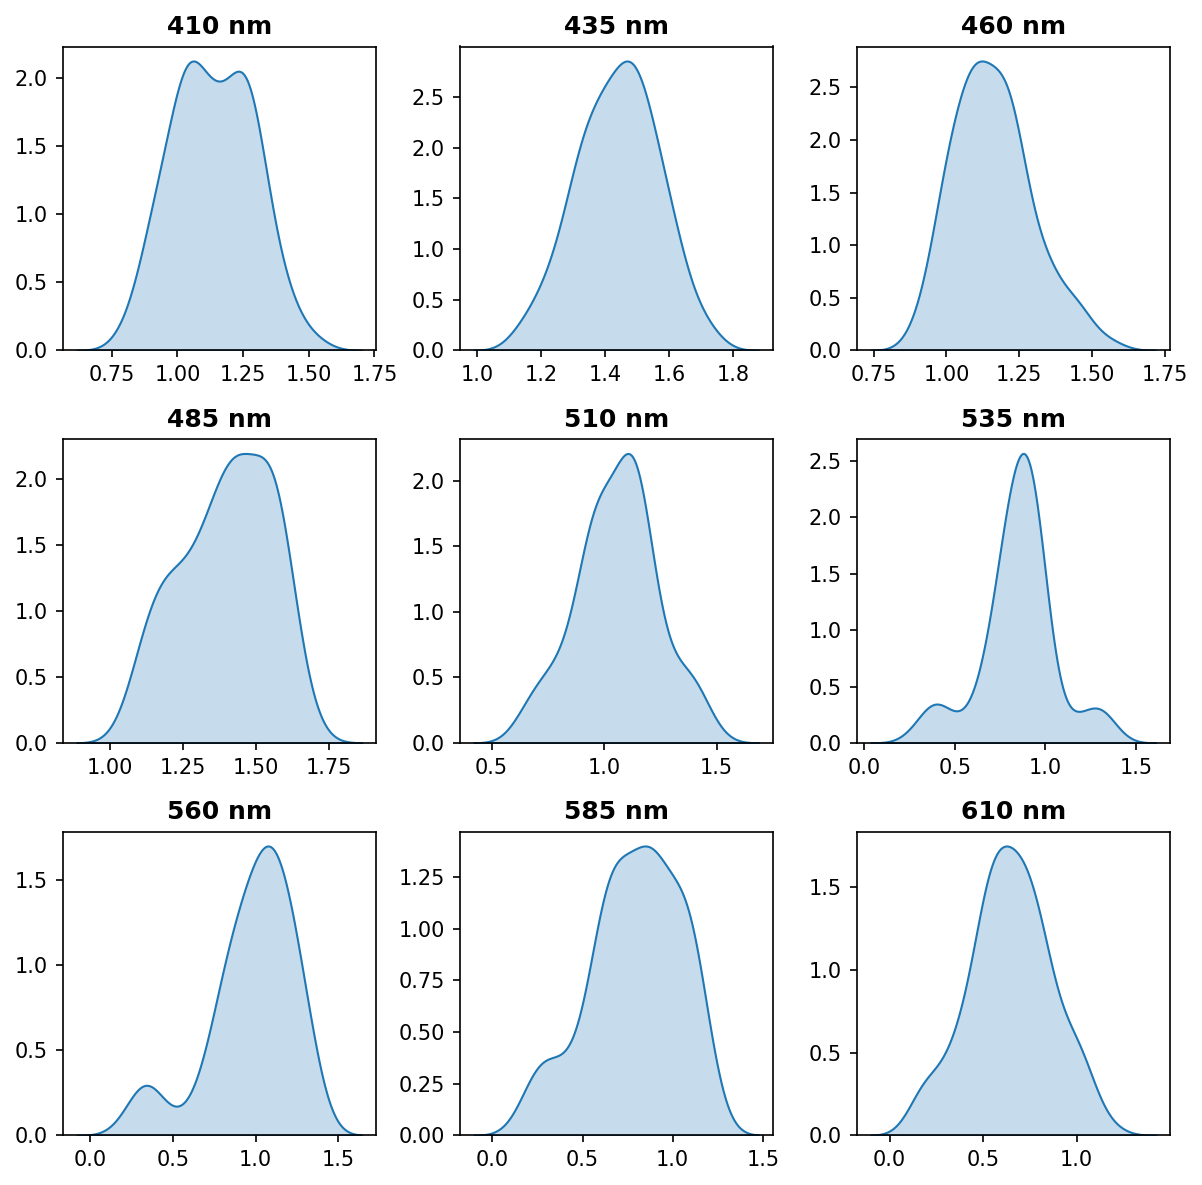

In [23]:
fig, axes = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, axe in enumerate(axes):
    for j, a in enumerate(axe):
        sns.kdeplot(abs_df.iloc[:, 3*i+j], ax=a, fill=True)
        a.set_xlabel("")
        a.set_ylabel("")
        a.set_title(abs_df.columns[3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\apple_dist_1.png")
plt.show()

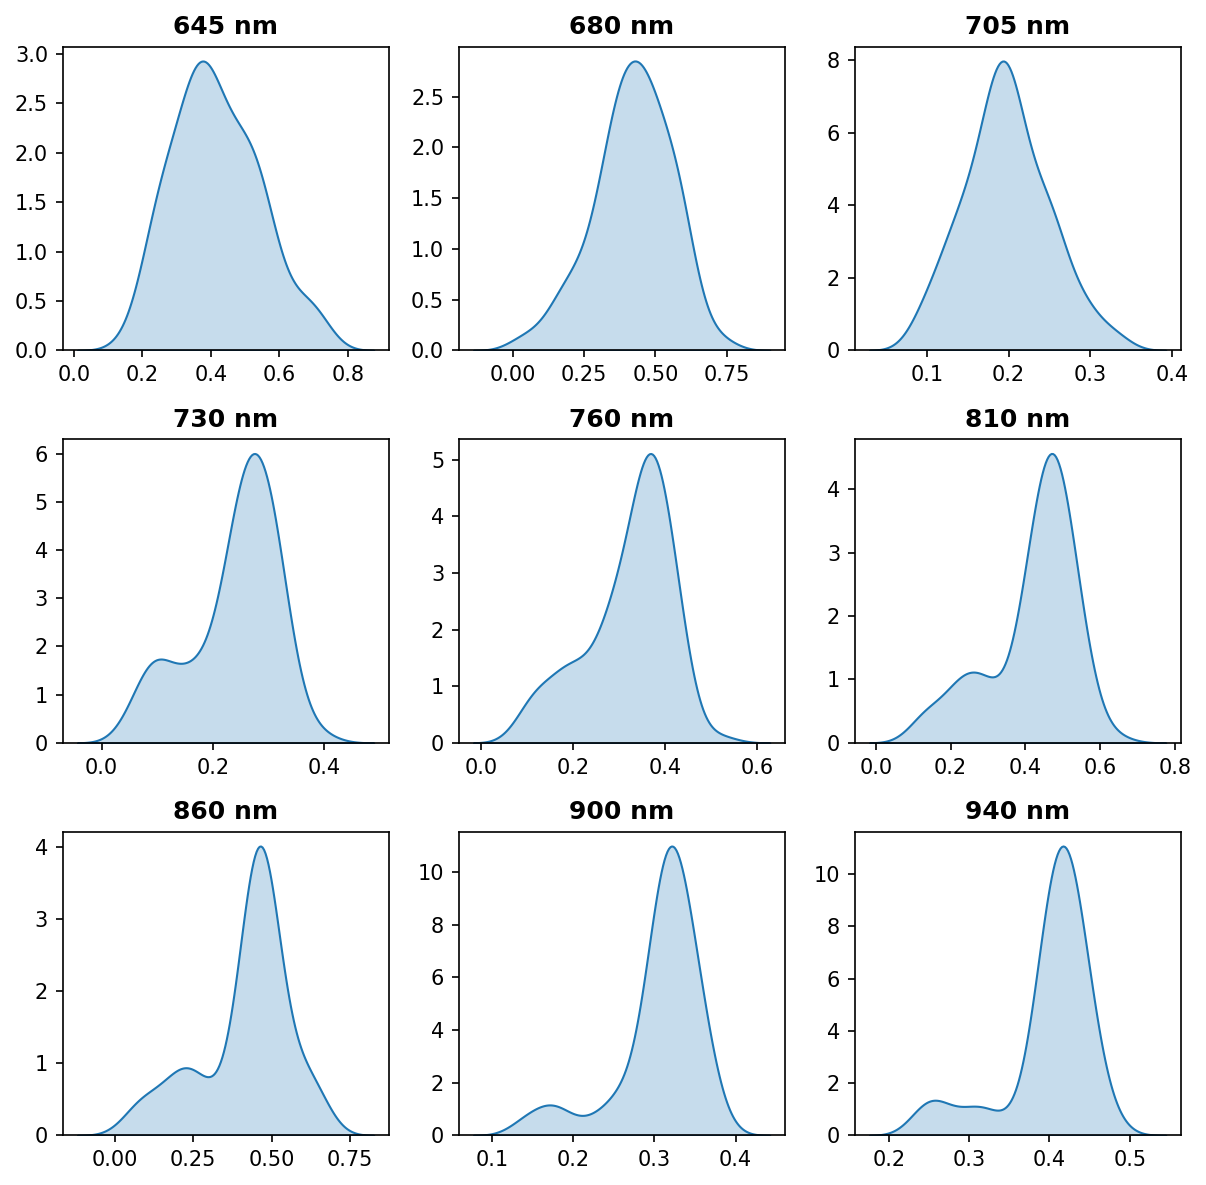

In [24]:
fig, axes = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, axe in enumerate(axes):
    for j, a in enumerate(axe):
        sns.kdeplot(abs_df.iloc[:, 9+3*i+j], ax=a, fill=True)
        a.set_xlabel("")
        a.set_ylabel("")
        a.set_title(abs_df.columns[9+3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\apple_dist_2.png")
plt.show()

### Correlation Coefficients (Absorbance values with Brix values)

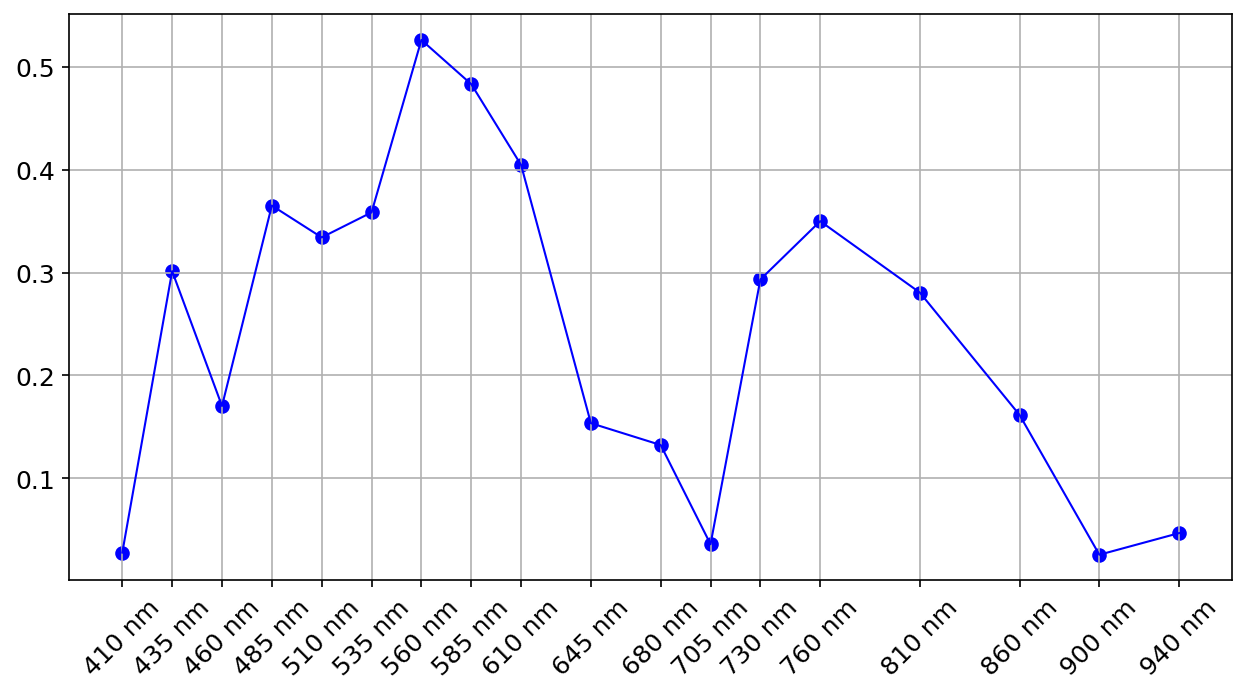

In [8]:
wavelengths_val = []
for w in wavelengths:
    wavelengths_val.append(int(w.split()[0]))

plt.figure(figsize=(10, 5), dpi=150)

plt.plot(wavelengths_val, abs_df.corr().abs().iloc[:, -1][:-1], color='blue', linewidth=1)
plt.scatter(wavelengths_val, abs_df.corr().abs().iloc[:, -1][:-1], color='blue')

plt.xticks(fontsize=12, rotation = 45, ticks=wavelengths_val, labels=wavelengths)
plt.yticks(fontsize=12,)

# plt.title("Correlation Coefficients (Absorbance v/s BRIX Values)", fontweight="bold")
plt.grid()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\corr_coeff_brix.png")
plt.show()

### Scatter Plots

In [19]:
outlier = abs_df.iloc[0, :]

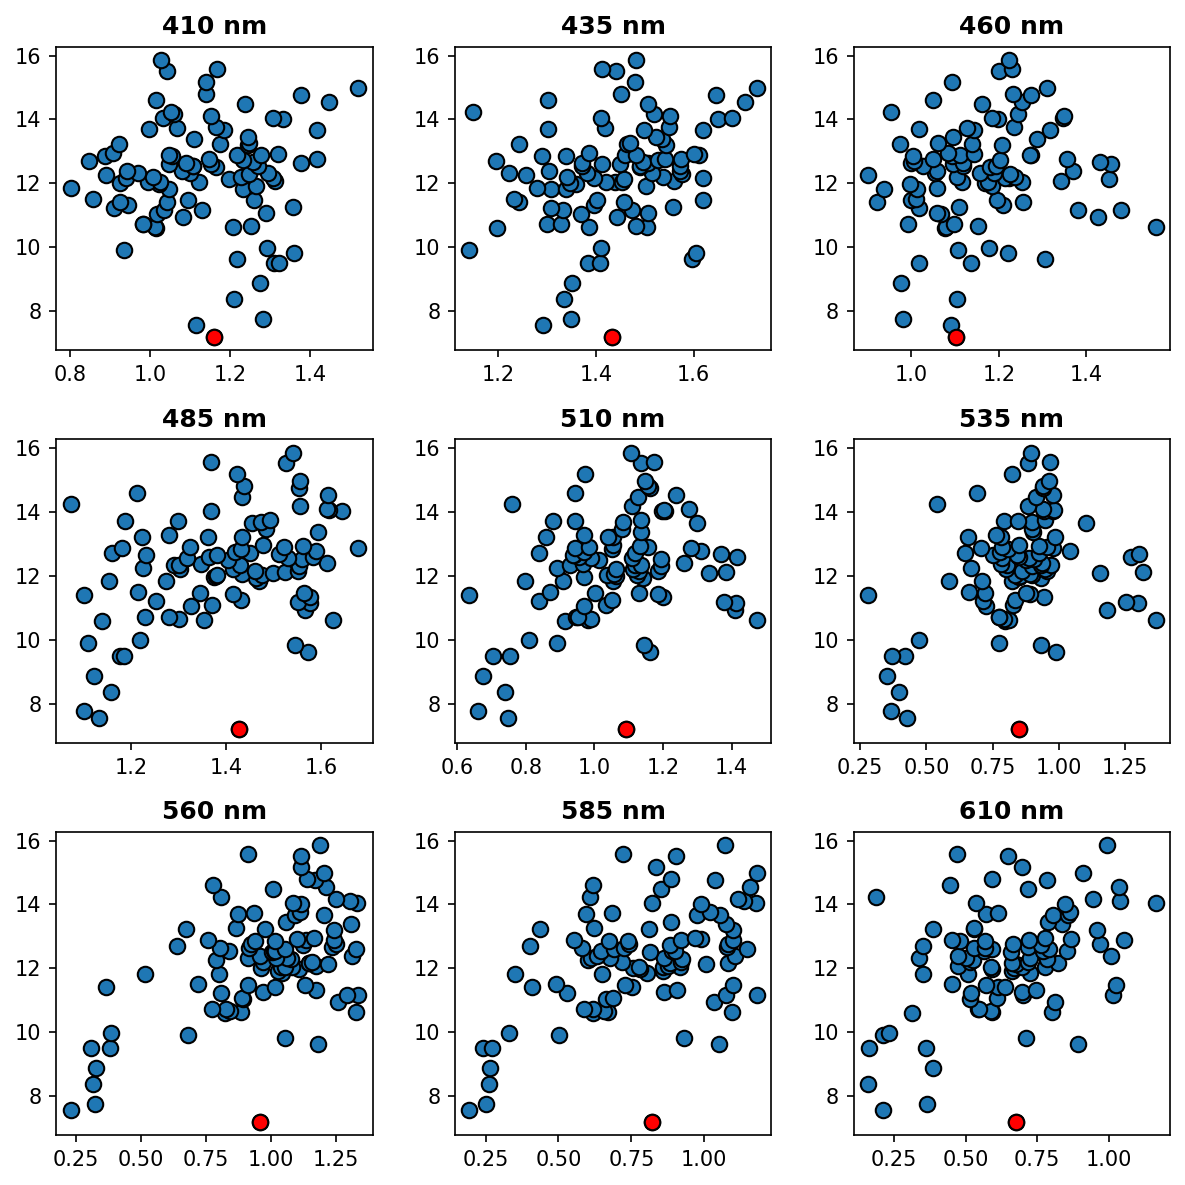

In [21]:
fig, axs = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, ax in enumerate(axs):
    for j, a in enumerate(ax):
        a.scatter(abs_df.iloc[:, 3*i+j], abs_df.iloc[:, -1], edgecolors='black', c='C0', s=55)
        a.scatter(outlier.iloc[3*i+j], outlier.iloc[-1], edgecolors='black', c='r', s=55)
        a.set_title(abs_df.columns[3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\apple_scatter_1.png")
plt.show()

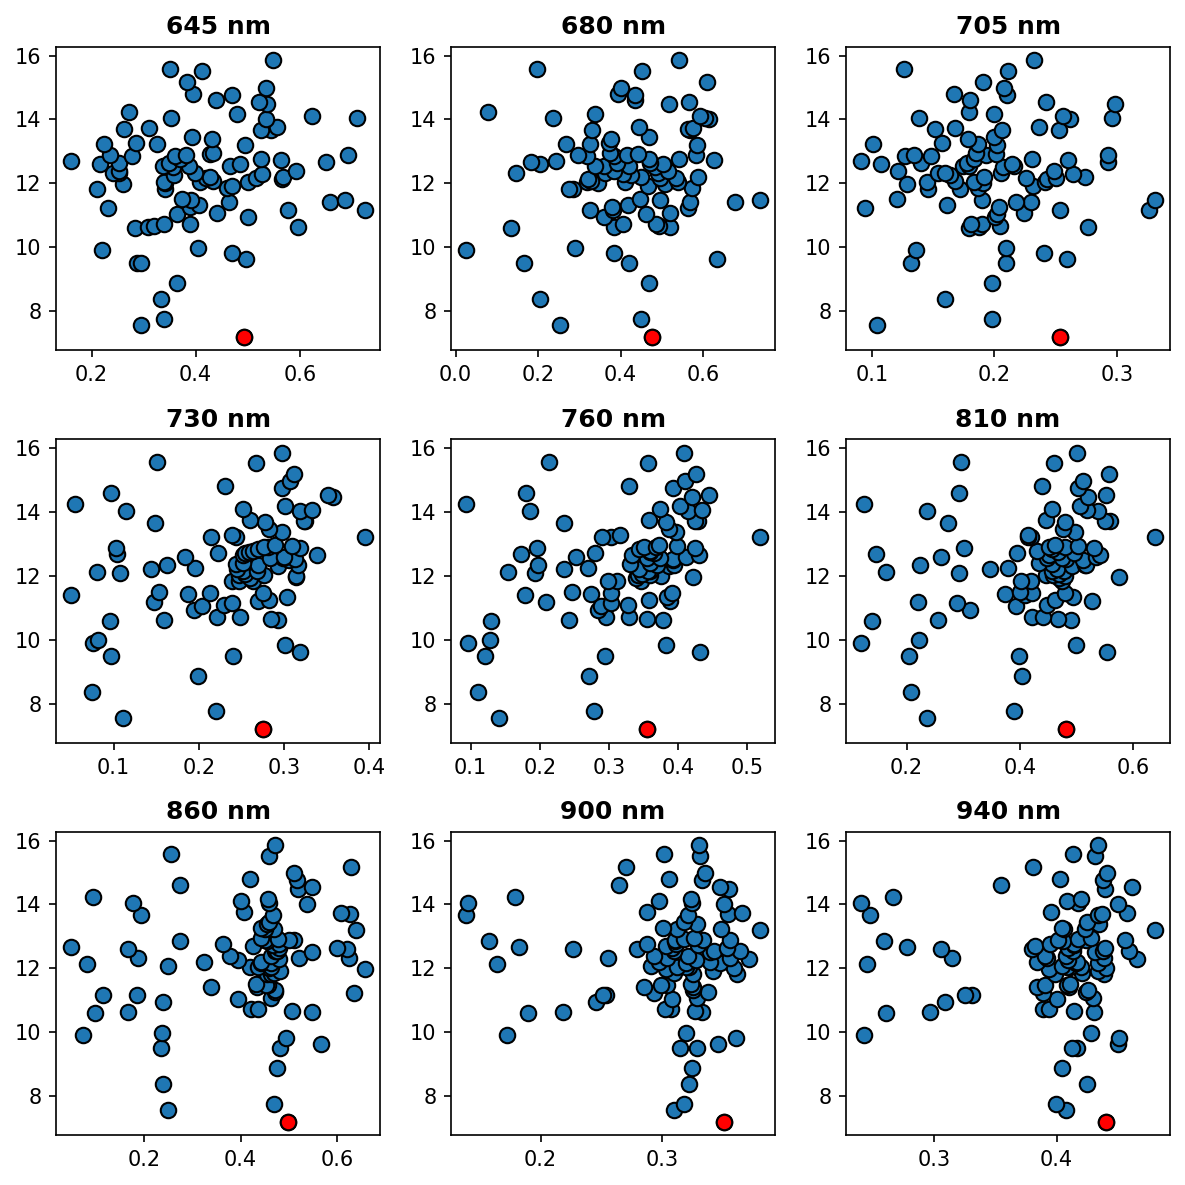

In [22]:
fig, axs = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, ax in enumerate(axs):
    for j, a in enumerate(ax):
        a.scatter(abs_df.iloc[:, 9+3*i+j], abs_df.iloc[:, -1], edgecolors='black', s=55)
        a.scatter(outlier.iloc[9+3*i+j], outlier.iloc[-1], edgecolors='black', c='r', s=55)
        a.set_title(abs_df.columns[9+3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\apple_scatter_2.png")
plt.show()